In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from matplotlib import pyplot

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# I. 데이터 불러오기




In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/monthly_sales_top39.csv')

In [ ]:
dataset

,year,month,region,city1,city2,sales_amounts,sales_volume,prices
0,2014,1,경남,거창,거창,47,71,665
1,2014,1,경남,의령,의령군,77,129,599
2,2014,1,경남,창녕,밀양,167,282,591
3,2014,1,경남,함양,산청,321,471,683
4,2014,1,경남,합천,합천,6,12,500
...,...,...,...,...,...,...,...,...
3194,2021,10,전북,부안,부안,229,274,836
3195,2021,10,전북,완주,전주,117,142,825
3196,2021,10,전북,익산,군산,23,32,717
3197,2021,10,충남,논산,부여,2,3,739


In [ ]:
DF1 = dataset[['year', 'region', 'sales_amounts','sales_volume']]
DF1

,year,region,sales_amounts,sales_volume
0,2014,경남,47,71
1,2014,경남,77,129
2,2014,경남,167,282
3,2014,경남,321,471
4,2014,경남,6,12
...,...,...,...,...
3194,2021,전북,229,274
3195,2021,전북,117,142
3196,2021,전북,23,32
3197,2021,충남,2,3


In [ ]:
DF2 = DF1.groupby(['year','region']).sum()
DF2


sales_amounts  sales_volume
year region                             
2014 경기               3708          8584
     경남               7553         18454
     경북               6331         13154
     광주                 41           107
     대구                262           572
...                    ...           ...
2021 부산               2105          2300
     전남             133705        159775
     전북              13066         12697
     제주              19701         18775
     충남               1751          2644

[79 rows x 2 columns]

In [ ]:
DF2['price']=(DF2['sales_amounts']*1000)/DF2['sales_volume']
DF2 

sales_amounts  sales_volume        price
year region                                          
2014 경기               3708          8584   431.966449
     경남               7553         18454   409.287959
     경북               6331         13154   481.298464
     광주                 41           107   383.177570
     대구                262           572   458.041958
...                    ...           ...          ...
2021 부산               2105          2300   915.217391
     전남             133705        159775   836.833046
     전북              13066         12697  1029.061983
     제주              19701         18775  1049.320905
     충남               1751          2644   662.254160

[79 rows x 3 columns]

In [ ]:
dataset2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/annual_produce_region.csv')
dataset2

,year,region,area_size,productivity,production_volume
0,2014,계,23911,6649,1589957
1,2014,서울,0,0,0
2,2014,부산,16,7271,1163
3,2014,대구,120,6089,7307
4,2014,인천,33,4072,1344
...,...,...,...,...,...
137,2021,전북,1687,8314,140261
138,2021,전남,6775,8547,579042
139,2021,경북,3159,9739,307653
140,2021,경남,4023,8423,338877


In [ ]:
dataset3 = pd.merge(DF2, dataset2, on = ['year', 'region'])

In [ ]:
dataset3

,year,region,sales_amounts,sales_volume,price,area_size,productivity,production_volume
0,2014,경기,3708,8584,431.966449,217,4080,8853
1,2014,경남,7553,18454,409.287959,5294,7237,383139
2,2014,경북,6331,13154,481.298464,2602,7193,187158
3,2014,광주,41,107,383.177570,83,6628,5501
4,2014,대구,262,572,458.041958,120,6089,7307
...,...,...,...,...,...,...,...,...
74,2021,부산,2105,2300,915.217391,26,6173,1581
75,2021,전남,133705,159775,836.833046,6775,8547,579042
76,2021,전북,13066,12697,1029.061983,1687,8314,140261
77,2021,제주,19701,18775,1049.320905,906,8265,74856


In [ ]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               79 non-null     int64  
 1   region             79 non-null     object 
 2   sales_amounts      79 non-null     int64  
 3   sales_volume       79 non-null     int64  
 4   price              79 non-null     float64
 5   area_size          79 non-null     int64  
 6   productivity       79 non-null     int64  
 7   production_volume  79 non-null     int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 5.6+ KB


In [ ]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

## (1) 가격 - 생산성

In [ ]:
data_price = dataset3['price']
data_productivity = dataset3['productivity']
correlation1 = pearsonr(data_price, data_productivity)
print(correlation1)

(0.04489367395005348, 0.6944215919925956)


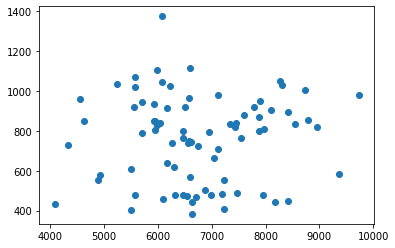

In [ ]:
pyplot.scatter(data_productivity, data_price)

## (2) 가격 - 생산량

In [ ]:
data_price = dataset3['price']
data_production_volume = dataset3['production_volume']
correlation2 = pearsonr(data_price, data_production_volume)
print(correlation2)

(-0.10859060696203149, 0.340787142556828)


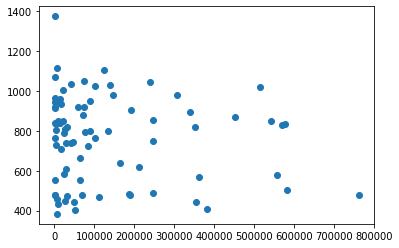

In [ ]:
pyplot.scatter(data_production_volume, data_price)

## (3) 거래량 - 생산량

In [ ]:
data_sales_volume = dataset3['sales_volume']
data_production_volume = dataset3['production_volume']
correlation3 = pearsonr(data_sales_volume, data_production_volume)
print(correlation3)

(0.8761017351871874, 4.13487600469971e-26)


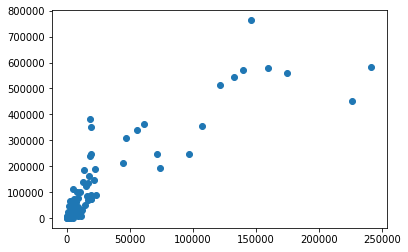

In [ ]:
pyplot.scatter(data_sales_volume, data_production_volume)

## (4) 거래량 - 가격

(-0.08951745521657223, 0.43272130394963537)


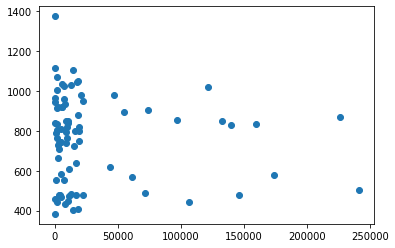

In [ ]:
correlation4 = pearsonr(data_sales_volume, data_price)
print(correlation4)
pyplot.scatter(data_sales_volume, data_price)

Seaborn

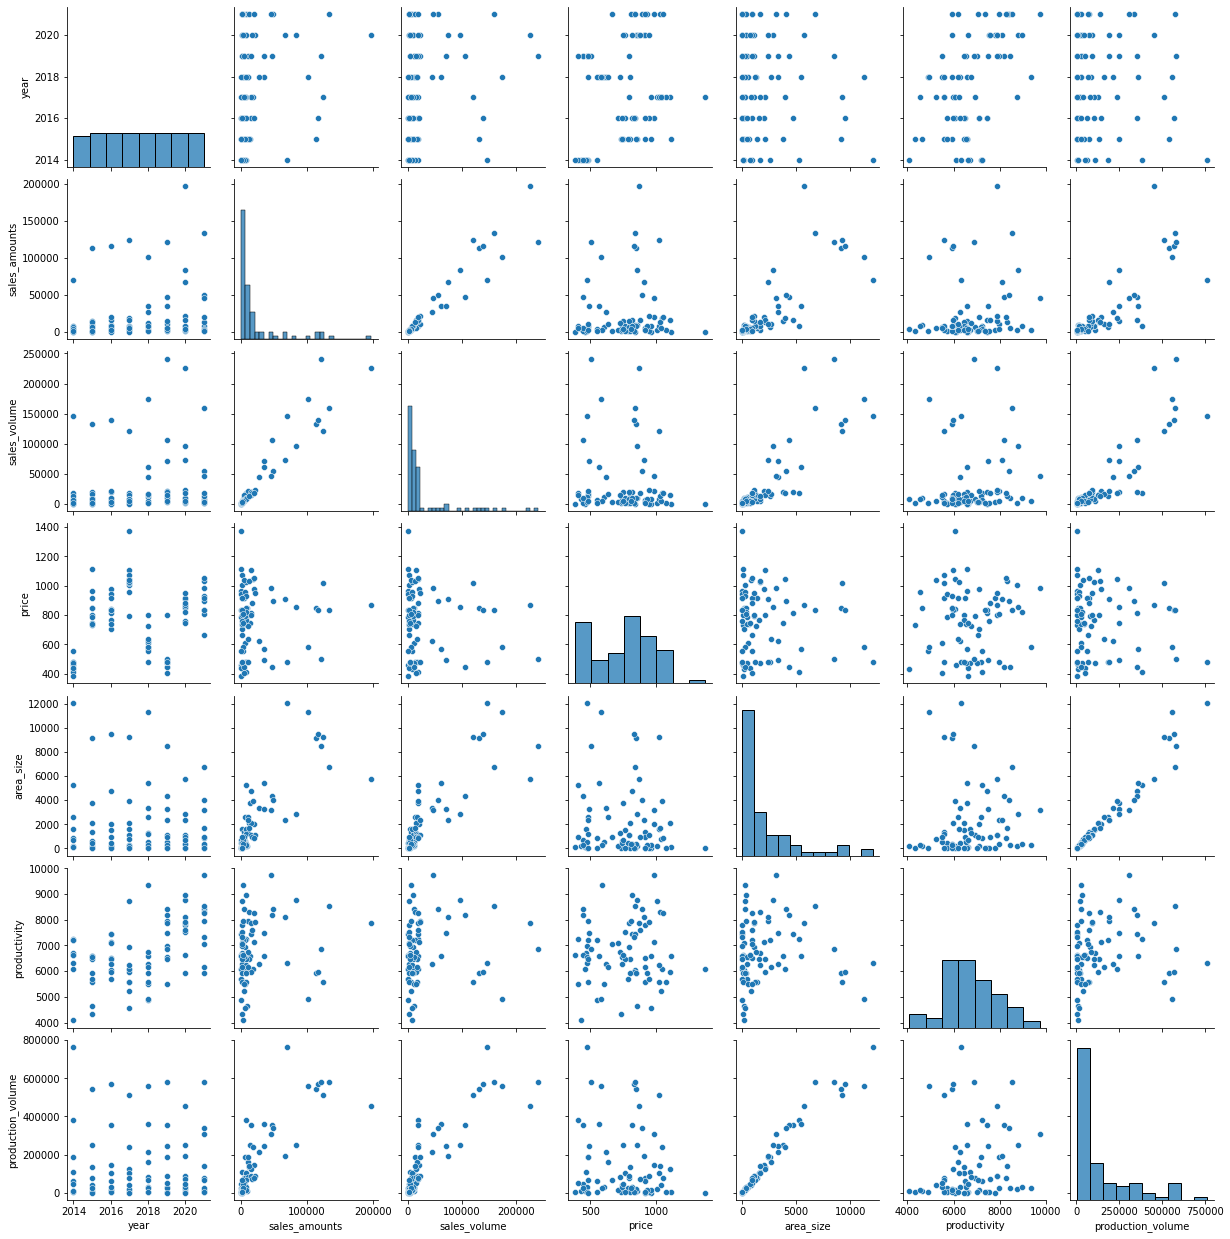

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(dataset3)
plt.show()

## Multivariate Regression 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = dataset3[['sales_volume', 'productivity', 'area_size']]
y = dataset3['price']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 12)

print('Train_data : ', X_train.shape, y_train.shape)
print('Test_data : ', X_test.shape, y_test.shape)

Train_data :  (63, 3) (63,)
Test_data :  (16, 3) (16,)


In [ ]:
from sklearn.linear_model import LinearRegression

MR = LinearRegression()
MR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('weight(w): ', MR.coef_)
print('bias(b): ', '%.8f'% MR.intercept_)

weight(w):  [-7.18424469e-05  1.63179105e-02 -7.64160585e-03]
bias(b):  674.01284763


In [ ]:
MR.score(X_test, y_test)

-0.03824317458057824

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, MR.predict(X_test))

39137.96200671834

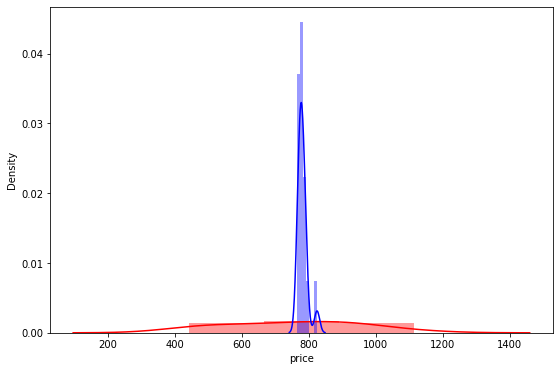

In [ ]:
y_hat = MR.predict(X_test)

plt.figure(figsize=(9,6))
ax1 = sns.distplot(y_test, label = 'y_test', color='red')
ax2 = sns.distplot(y_hat, label = 'y_hat', ax=ax1, color='blue')
plt.show()

# II. 데이터 불러오기

In [ ]:
import pandas as pd
production = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/annual_produce_region.csv')
sales = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/monthly_sales_top39.csv')
weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/monthly_weather.csv')

In [ ]:
import pandas as pd
merge = pd.merge(production, sales, on = ['year', 'region'])

In [ ]:
merge = pd.merge(merge, weather, on = ['year', 'city2'])

In [ ]:
merge.to_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/merge.csv', index = False)

* 2021년 데이터 삭제

In [ ]:
idx_2021 = merge[merge['year'] == 2021].index
merge.drop(idx_2021, inplace=True)

In [ ]:
merge.to_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/merge2.csv', index = False)

## (1) 평균온도 - 10ha 당 생산량

In [ ]:
DF_AT = merge[['productivity','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','AT_7','AT_8','AT_9','AT_10','AT_11','AT_12']]
DF_AT.head(3)


,productivity,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,AT_7,AT_8,AT_9,AT_10,AT_11,AT_12
0,6089,2.8,4.5,9.7,15.5,21.2,23.4,27.0,24.7,22.5,16.4,10.3,1.2
1,6089,2.8,4.5,9.7,15.5,21.2,23.4,27.0,24.7,22.5,16.4,10.3,1.2
2,6089,2.8,4.5,9.7,15.5,21.2,23.4,27.0,24.7,22.5,16.4,10.3,1.2


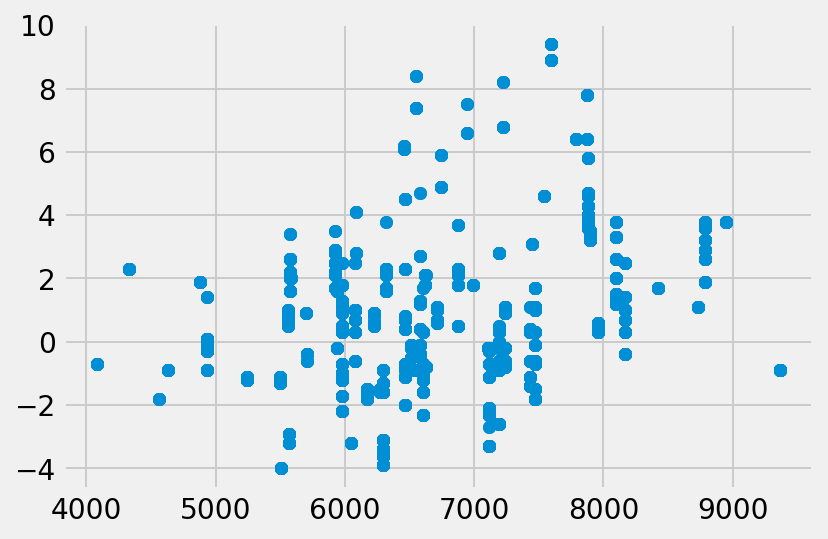

In [ ]:
data1 = DF_AT['productivity']
data2 = DF_AT['AT_1']
pyplot.scatter(data1, data2)

In [ ]:
from scipy.stats import pearsonr

In [ ]:
from scipy.stats import spearmanr

In [ ]:
data_p = DF_AT['productivity']
data_AT_1 = DF_AT['AT_1']
data_AT_2 = DF_AT['AT_2']
data_AT_3 = DF_AT['AT_3']
data_AT_4 = DF_AT['AT_4']
data_AT_5 = DF_AT['AT_5']
data_AT_6 = DF_AT['AT_6']
data_AT_7 = DF_AT['AT_7']
data_AT_8 = DF_AT['AT_8']
data_AT_9 = DF_AT['AT_9']
data_AT_10 = DF_AT['AT_10']
data_AT_11 = DF_AT['AT_11']
data_AT_12 = DF_AT['AT_12']

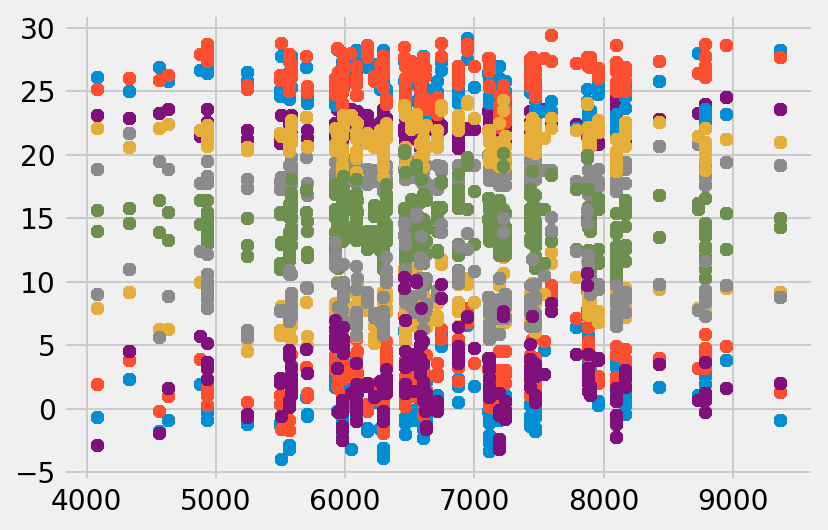

In [ ]:
pyplot.scatter(data_p, data_AT_1)
pyplot.scatter(data_p, data_AT_2)
pyplot.scatter(data_p, data_AT_3)
pyplot.scatter(data_p, data_AT_4)
pyplot.scatter(data_p, data_AT_5)
pyplot.scatter(data_p, data_AT_6)
pyplot.scatter(data_p, data_AT_7)
pyplot.scatter(data_p, data_AT_8)
pyplot.scatter(data_p, data_AT_9)
pyplot.scatter(data_p, data_AT_10)
pyplot.scatter(data_p, data_AT_11)
pyplot.scatter(data_p, data_AT_12)


In [ ]:
correlation_AT_1 = pearsonr(data_p, data_AT_1)
correlation_AT_2 = pearsonr(data_p, data_AT_2)
correlation_AT_3 = pearsonr(data_p, data_AT_3)
correlation_AT_4 = pearsonr(data_p, data_AT_4)
correlation_AT_5 = pearsonr(data_p, data_AT_5)
correlation_AT_6 = pearsonr(data_p, data_AT_6)
correlation_AT_7 = pearsonr(data_p, data_AT_7)
correlation_AT_8 = pearsonr(data_p, data_AT_8)
correlation_AT_9 = pearsonr(data_p, data_AT_9)
correlation_AT_10 = pearsonr(data_p, data_AT_10)
correlation_AT_11 = pearsonr(data_p, data_AT_11)
correlation_AT_12 = pearsonr(data_p, data_AT_12)
print(correlation_AT_1)
print(correlation_AT_2)
print(correlation_AT_3)
print(correlation_AT_4)
print(correlation_AT_5)
print(correlation_AT_6)
print(correlation_AT_7)
print(correlation_AT_8)
print(correlation_AT_9)
print(correlation_AT_10)
print(correlation_AT_11)
print(correlation_AT_12)



(0.30001408294575893, 4.878424729453036e-58)
(0.37608526083945976, 1.0925902984753639e-92)
(0.29663353335653514, 1.0187772799196063e-56)
(-0.350232565570745, 8.282339740787366e-80)
(0.026298205157334848, 0.16899650846497818)
(0.22830451653670455, 1.0726002135506067e-33)
(-0.4936937064011155, 3.7789178693470457e-168)
(0.09964507114968671, 1.7539282273056764e-07)
(-0.024429900242097843, 0.2013587709305547)
(-0.03665048872236574, 0.05521407206977021)
(0.042237875033342344, 0.027125437734274168)
(-0.04572023726490422, 0.016753465907601905)


## (2) 강수량 - 10ha 당 생산량

In [ ]:
DF_RAIN = merge[['productivity','RAIN_1','RAIN_2','RAIN_3','RAIN_4','RAIN_5','RAIN_6','RAIN_7','RAIN_8','RAIN_9','RAIN_10','RAIN_11','RAIN_12']]
DF_RAIN.head(3)


,productivity,RAIN_1,RAIN_2,RAIN_3,RAIN_4,RAIN_5,RAIN_6,RAIN_7,RAIN_8,RAIN_9,RAIN_10,RAIN_11,RAIN_12
0,6089,1.7,7.0,110.5,105.0,24.4,28.2,142.6,402.8,110.5,88.6,45.3,5.5
1,6089,1.7,7.0,110.5,105.0,24.4,28.2,142.6,402.8,110.5,88.6,45.3,5.5
2,6089,1.7,7.0,110.5,105.0,24.4,28.2,142.6,402.8,110.5,88.6,45.3,5.5


In [ ]:
data_p = DF_RAIN['productivity']
data_RAIN_1 = DF_RAIN['RAIN_1']
data_RAIN_2 = DF_RAIN['RAIN_2']
data_RAIN_3 = DF_RAIN['RAIN_3']
data_RAIN_4 = DF_RAIN['RAIN_4']
data_RAIN_5 = DF_RAIN['RAIN_5']
data_RAIN_6 = DF_RAIN['RAIN_6']
data_RAIN_7 = DF_RAIN['RAIN_7']
data_RAIN_8 = DF_RAIN['RAIN_8']
data_RAIN_9 = DF_RAIN['RAIN_9']
data_RAIN_10 = DF_RAIN['RAIN_10']
data_RAIN_11 = DF_RAIN['RAIN_11']
data_RAIN_12 = DF_RAIN['RAIN_12']

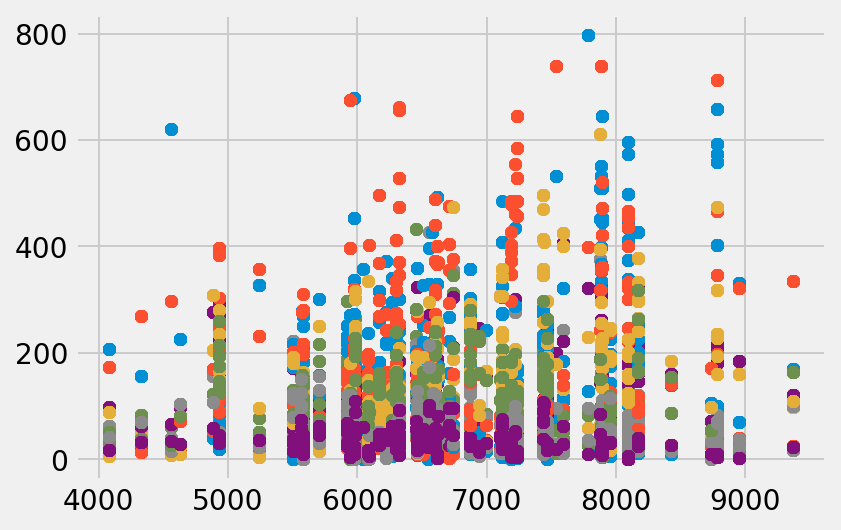

In [ ]:
pyplot.scatter(data_p, data_RAIN_1)
pyplot.scatter(data_p, data_RAIN_2)
pyplot.scatter(data_p, data_RAIN_3)
pyplot.scatter(data_p, data_RAIN_4)
pyplot.scatter(data_p, data_RAIN_5)
pyplot.scatter(data_p, data_RAIN_6)
pyplot.scatter(data_p, data_RAIN_7)
pyplot.scatter(data_p, data_RAIN_8)
pyplot.scatter(data_p, data_RAIN_9)
pyplot.scatter(data_p, data_RAIN_10)
pyplot.scatter(data_p, data_RAIN_11)
pyplot.scatter(data_p, data_RAIN_12)

In [ ]:
correlation_RAIN_1 = pearsonr(data_p, data_RAIN_1)
correlation_RAIN_2 = pearsonr(data_p, data_RAIN_2)
correlation_RAIN_3 = pearsonr(data_p, data_RAIN_3)
correlation_RAIN_4 = pearsonr(data_p, data_RAIN_4)
correlation_RAIN_5 = pearsonr(data_p, data_RAIN_5)
correlation_RAIN_6 = pearsonr(data_p, data_RAIN_6)
correlation_RAIN_7 = pearsonr(data_p, data_RAIN_7)
correlation_RAIN_8 = pearsonr(data_p, data_RAIN_8)
correlation_RAIN_9 = pearsonr(data_p, data_RAIN_9)
correlation_RAIN_10 = pearsonr(data_p, data_RAIN_10)
correlation_RAIN_11 = pearsonr(data_p, data_RAIN_11)
correlation_RAIN_12 = pearsonr(data_p, data_RAIN_12)
print(correlation_RAIN_1)
print(correlation_RAIN_2)
print(correlation_RAIN_3)
print(correlation_RAIN_4)
print(correlation_RAIN_5)
print(correlation_RAIN_6)
print(correlation_RAIN_7)
print(correlation_RAIN_8)
print(correlation_RAIN_9)
print(correlation_RAIN_10)
print(correlation_RAIN_11)
print(correlation_RAIN_12)

(0.30307632131160184, 3.0017728811334384e-59)
(0.20868379697320094, 2.6111855550100714e-28)
(-0.2415576048414735, 1.235192560275684e-37)
(-0.25636151287019715, 2.505714236571481e-42)
(0.04405801909676873, 0.02116540379465354)
(0.26773561772027343, 3.79130217404618e-46)
(0.4107705923114774, 6.525359996050731e-112)
(0.17372753498445698, 5.469592751370113e-20)
(0.4228628162212226, 3.597900253464907e-119)
(-0.13602447796662698, 8.915436035151615e-13)
(-0.2331109166430685, 4.269136792715282e-35)
(-0.28915402311245875, 7.33508899158215e-54)


## (3) 일조량 - 10ha 당 생산량

In [ ]:
DF_SUN = merge[['productivity','SUN_1','SUN_2','SUN_3','SUN_4','SUN_5','SUN_6','SUN_7','SUN_8','SUN_9','SUN_10','SUN_11','SUN_12']]
DF_SUN.head(3)

,productivity,SUN_1,SUN_2,SUN_3,SUN_4,SUN_5,SUN_6,SUN_7,SUN_8,SUN_9,SUN_10,SUN_11,SUN_12
0,6089,233.0,137.3,219.4,211.1,304.3,161.8,193.0,122.1,209.8,230.1,192.0,214.5
1,6089,233.0,137.3,219.4,211.1,304.3,161.8,193.0,122.1,209.8,230.1,192.0,214.5
2,6089,233.0,137.3,219.4,211.1,304.3,161.8,193.0,122.1,209.8,230.1,192.0,214.5


In [ ]:
data_p = DF_SUN['productivity']
data_SUN_1 = DF_SUN['SUN_1']
data_SUN_2 = DF_SUN['SUN_2']
data_SUN_3 = DF_SUN['SUN_3']
data_SUN_4 = DF_SUN['SUN_4']
data_SUN_5 = DF_SUN['SUN_5']
data_SUN_6 = DF_SUN['SUN_6']
data_SUN_7 = DF_SUN['SUN_7']
data_SUN_8 = DF_SUN['SUN_8']
data_SUN_9 = DF_SUN['SUN_9']
data_SUN_10 = DF_SUN['SUN_10']
data_SUN_11 = DF_SUN['SUN_11']
data_SUN_12 = DF_SUN['SUN_12']

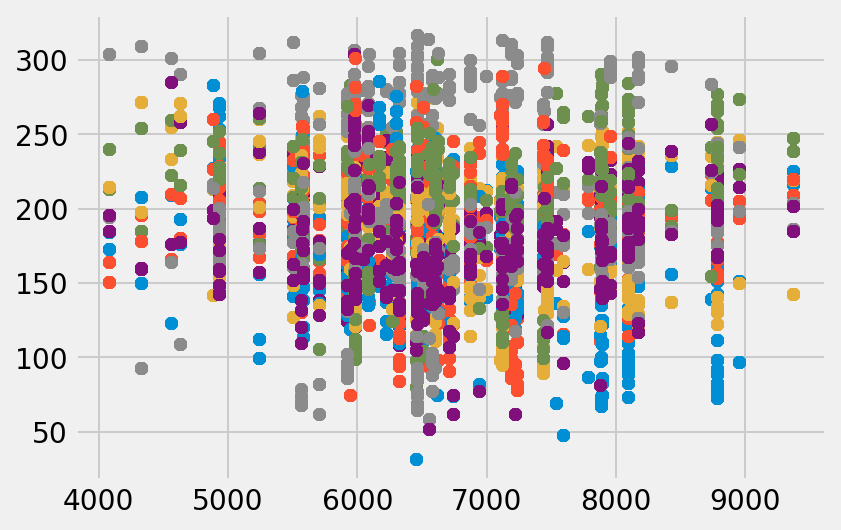

In [ ]:
pyplot.scatter(data_p, data_SUN_1)
pyplot.scatter(data_p, data_SUN_2)
pyplot.scatter(data_p, data_SUN_3)
pyplot.scatter(data_p, data_SUN_4)
pyplot.scatter(data_p, data_SUN_5)
pyplot.scatter(data_p, data_SUN_6)
pyplot.scatter(data_p, data_SUN_7)
pyplot.scatter(data_p, data_SUN_8)
pyplot.scatter(data_p, data_SUN_9)
pyplot.scatter(data_p, data_SUN_10)
pyplot.scatter(data_p, data_SUN_11)
pyplot.scatter(data_p, data_SUN_12)

In [ ]:
correlation_SUN_1 = pearsonr(data_p, data_SUN_1)
correlation_SUN_2 = pearsonr(data_p, data_SUN_2)
correlation_SUN_3 = pearsonr(data_p, data_SUN_3)
correlation_SUN_4 = pearsonr(data_p, data_SUN_4)
correlation_SUN_5 = pearsonr(data_p, data_SUN_5)
correlation_SUN_6 = pearsonr(data_p, data_SUN_6)
correlation_SUN_7 = pearsonr(data_p, data_SUN_7)
correlation_SUN_8 = pearsonr(data_p, data_SUN_8)
correlation_SUN_9 = pearsonr(data_p, data_SUN_9)
correlation_SUN_10 = pearsonr(data_p, data_SUN_10)
correlation_SUN_11 = pearsonr(data_p, data_SUN_11)
correlation_SUN_12 = pearsonr(data_p, data_SUN_12)
print(correlation_SUN_1)
print(correlation_SUN_2)
print(correlation_SUN_3)
print(correlation_SUN_4)
print(correlation_SUN_5)
print(correlation_SUN_6)
print(correlation_SUN_7)
print(correlation_SUN_8)
print(correlation_SUN_9)
print(correlation_SUN_10)
print(correlation_SUN_11)
print(correlation_SUN_12)

(-0.13909749729788262, 2.685245005757025e-13)
(0.0469896477999786, 0.013949478858522577)
(0.09877241970277455, 2.246182103350944e-07)
(0.2478331383971838, 1.38218843149612e-39)
(-0.025832635594008384, 0.17667070794420348)
(0.07412950988388743, 0.00010370534539605334)
(-0.4389849205367726, 2.540377955445535e-129)
(-0.14837156877347463, 6.0967020400519e-15)
(-0.46415010608280255, 2.636368740650265e-146)
(-0.009310001944342764, 0.6263622696789465)
(0.1076013192384307, 1.6698964407413687e-08)
(0.21440279343125263, 7.960387062279696e-30)
